In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import librosa
import os

In [3]:
!pip install speechbrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408 kB 2.8 MB/s 
     |████████████████████████████████| 1.2 MB 60.4 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
     |████████████████████████████████| 109 kB 76.9 MB/s 
     |████████████████████████████████| 546 kB 68.8 MB/s 
  Created wheel for hyperpyyaml: filename=HyperPyYAML-1.0.1-py3-none-any.whl size=15192 sha256=9a45cef4a774c09f1b8d8a0c7328bad409a7e403825af5f4556ae83476789e12
  Stored in directory: /root/.cache/pip/wheels/6c/87/65/266d722c3932f81f16332ce842e972be8421e3a9cd3771766b
Successfully built hyperpyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier
import numpy as np
from scipy.io import wavfile
import numpy as np
from scipy.io.wavfile import write
import torch

classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")
# signal, fs =torchaudio.load('/content/drive/MyDrive/thesis/testfile_generated_e2e.wav')
# embeddings = classifier.encode_batch(signal)

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.8 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [5]:
from scipy import linalg, mat, dot
def cos_pair(a,b):
  return dot(a,b.T)/linalg.norm(a)/linalg.norm(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


0
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/1389.wav
Min matrix:0.1871555215733913


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2318.)
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  This is separate from the ipykernel package so we can avoid doing imports until


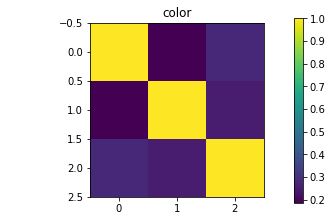

100
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/1518.wav
Min matrix:0.34505606856206766
200
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/1632.wav
Min matrix:0.30282913667407274
300
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/1757.wav
Min matrix:0.02368939114690124
400
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/1875.wav
Min matrix:-0.12411478149037677
500
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/3045.wav
Min matrix:0.2989246105636543
600
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/3212.wav
Min matrix:-0.042097031068640225
700
__________________________________

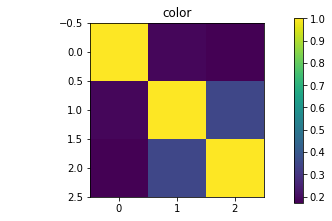

1100
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/238.wav
Min matrix:-0.06572632839204462
1200
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/375.wav
Min matrix:0.07521495763515137
1300
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/507.wav
Min matrix:-0.029228963307226453
1400
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/645.wav
Min matrix:-0.06864247607554669
1500
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/780.wav
Min matrix:0.27083434498408765
1600
____________________________________________________________________________________
/content/drive/MyDrive/WAV_VAD/915.wav
Min matrix:0.09370939745005914
1700
_______________________________

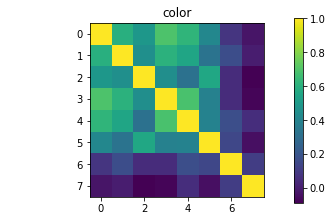

In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/WAV_VAD/*.wav'
def get_all_filename_from_folder(path):
  return glob.glob(path)

x = get_all_filename_from_folder(path)
min_mat = []
min_path = []
for _ in range(len(x)):
  frequency, signal = wavfile.read(x[_])
  slice_length = 1.2 # in seconds
  overlap = 0.2 # in seconds
  slices = np.arange(0, len(signal)/frequency, slice_length-overlap, dtype=np.int)
  i = 0
  audio = []
  matrix_audio = []
  for start, end in zip(slices[:-1], slices[1:]):
      i = i + 1
      start_audio = start * frequency
      end_audio = (end + overlap)* frequency
      audio_slice = signal[int(start_audio): int(end_audio)]
      audio_slice = audio_slice.reshape(1,-1)
      audio_slice = torch.tensor(audio_slice)
      audio_slice = classifier.encode_batch(audio_slice)
      audio_slice = audio_slice.squeeze()
      audio.append(audio_slice)
  matrix_audio = [ [0]*(len(audio)) for i in range(len(audio))]
  for i in range(len(audio)):
    for j in range(len(audio)):
      matrix_audio[i][j]=(cos_pair(audio[i], audio[j]))
  mymin = min([min(r) for r in matrix_audio])
  min_mat.append(mymin)
  min_path.append(x[_])
  if (_%100==0):
    print(str(_))
    print("____________________________________________________________________________________")
    # print(matrix_audio)
    print(str(x[_]))
    print("Min matrix:" + str(mymin))
  if (_%1000==0):
    fig = plt.figure(figsize=(6, 3.2))
    ax = fig.add_subplot(111)
    ax.set_title('color')
    plt.imshow(matrix_audio)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()






In [7]:
import pandas as pd
data = pd.DataFrame([min_mat,min_path]) #Each list would be added as a row
data = data.transpose() #To Transpose and make each rows as columns
data.columns=['MinCos','Path'] #Rename the columns
data.to_csv("/content/drive/MyDrive/Viet.csv")  

In [8]:
!pip install sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2662 sha256=09139fe0b625c71951bac0167fe316b5b8877bd8439f1affe656a5d859a091ff
  Stored in directory: /root/.cache/pip/wheels/cc/26/02/785cf1aeaa8d9e565796a1b962467bcdf62172c8fe12096ffb
Successfully built sns


In [9]:
import pandas as pd
Viet = pd.read_csv("/content/drive/MyDrive/Viet.csv")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


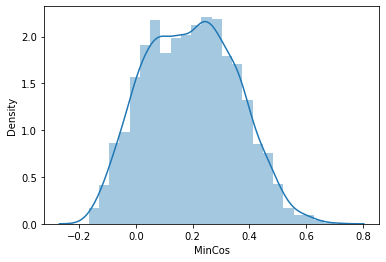

In [10]:
import seaborn as sns
sns.distplot(Viet['MinCos']) #blue
# sns.distplot(JP['MinCos']) #orange
# sns.distplot(FI['MinCos']) #green

In [12]:
s = 0
for i in range(len(Viet)):
  if Viet['MinCos'][i]>=0.2:
    s = s + librosa.get_duration(filename = Viet['Path'][i])
print(s)


4838.442000000016
